# Аппроксимация методом наименьших квадратов.

Рассмотрим функцию $y = f(x)$ определенной набором значений $y_0, y_1, \cdots, y_n$ в точках $x_0, x_1, \cdots, x_n$.

In [1]:
x = [-1, -0.7, -0.43, -0.14, -0.14, 0.43, 0.71, 1, 1.29, 1.57, 1.86, 2.14, 2.43, 2.71, 3]
y = [-2.25, -0.77, 0.21, 0.44, 0.64, 0.03, -0.22, -0.84, -1.2, -1.03, -0.37, 0.61, 2.67, 5.04, 8.90]
n = len(x)

## I Найдите многочлен наилучшего приближения.

$$
P_m(x) = a_0 + a_1 x + \cdots + a_m x^m
$$

используйте линейный метод наименьших квадратов. С его помощью

1. реализуйте алгоритм, создающий  "design matrix", используя $1, x, \cdots, x^m$ в качестве базисных функций.

2. постройте явно нормальную систему уравнений задачи наименьших квадратов при фиксированных значениях $m$.

3. решите систему уравнений, чтобы найти коэффициенты $P_m(x)$ для $m = 0, 1, 2, \dots$. Для решения задач линейной алгебры можете использовать либо библиотечные функции (`numpy.linalg.solve`), либо Вашу реализацию LU - разложение из 1 недели.

(33% итоговой оценки)

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def design_matrix(m = 5, x=x):
    design_matrix = []
    for i in range(len(x)): 
        row = []
        for s in range(m + 1):
            row.append(x[i]**s)
        design_matrix.append(row)
    D = np.array(design_matrix)
    return D

Можем записать нашу систему уравнений $y = Da$, где а - вектор коэффициентов $a = (a_0, a_1, ..., a_m)^T$. 
Нужно решить ее относительно а.


Нормальная система уравнений запишется $$D^T D a = D^T y$$ $$F = D^T D, u = D^T y$$

In [4]:
def solve_sys(m=5, x=x):
    D = design_matrix(m, x)
    F = D.T @ D
    u = D.T @ y
    return D, np.linalg.solve(F, u)

In [5]:
for i in range(12):
    print('Для m =',i, 'коэффициенты:', solve_sys(i)[1])

Для m = 0 коэффициенты: [0.79066667]
Для m = 1 коэффициенты: [-0.6479869   1.46502399]
Для m = 2 коэффициенты: [-1.25772058 -0.65313865  1.0667959 ]
Для m = 3 коэффициенты: [ 0.49483598 -0.26983377 -2.01973166  1.01540301]
Для m = 4 коэффициенты: [ 0.51184244 -0.33857023 -2.05689291  1.08931365 -0.01872316]
Для m = 5 коэффициенты: [ 0.53158296 -0.24431123 -2.15174437  0.99954653  0.07265921 -0.01835276]
Для m = 6 коэффициенты: [ 0.58335489 -0.21341539 -2.47667914  1.08743364  0.3156542  -0.17478186
  0.02574425]
Для m = 7 коэффициенты: [ 0.5744677  -0.13006497 -2.3829579   0.80842609  0.3196533   0.0116892
 -0.06899496  0.01366621]
Для m = 8 коэффициенты: [ 0.53749246 -0.37095536 -2.06051933  1.53912235 -0.54617266 -0.22834563
  0.51017192 -0.21721566  0.02885626]
Для m = 9 коэффициенты: [ 0.50918939 -0.43758283 -1.67901143  1.61523578 -1.43465948  0.20209009
  0.91271625 -0.64210814  0.16431079 -0.01477536]
Для m = 10 коэффициенты: [ 0.4960225  -0.33609057 -1.29798     0.70406194 -2.1

## II 

Чтобы найти оптимальное значение $m$, используйти следующий критерий: возьмем $m=0, 1, 2, \dots$, для каждого значения $m$ вычислим

$$
\sigma_m^2 = \frac{1}{n - m} \sum_{k=0}^n \left( P_m(x_k) - y_k \right)^2
$$

и возьмем такое значение $m$, при котором $\sigma_m$ стабилизируется или начинает расти.

(33% итоговой оценки)

In [6]:
def sigma(m):
    summ = 0 
    solve = solve_sys(m)
    answer = solve[0] @ solve[1]
    summ = 1/(n - m)*sum((answer - y)**2)
    return summ

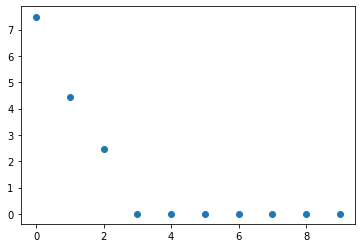

In [7]:
res = []
for i in range(10):
    res.append(sigma(i))
plt.scatter(range(10), res)
plt.show()

Видно, что при m=3 сигма стабилизировалась. Это и будет оптимальным значением.

Постройте ваши полиномы $P_m(x)$ вместе с данными. Визуально сравните полиномы различных степеней. Согласуется ли визуальное сравнение с ожидаемым оптимальным значением $m$?

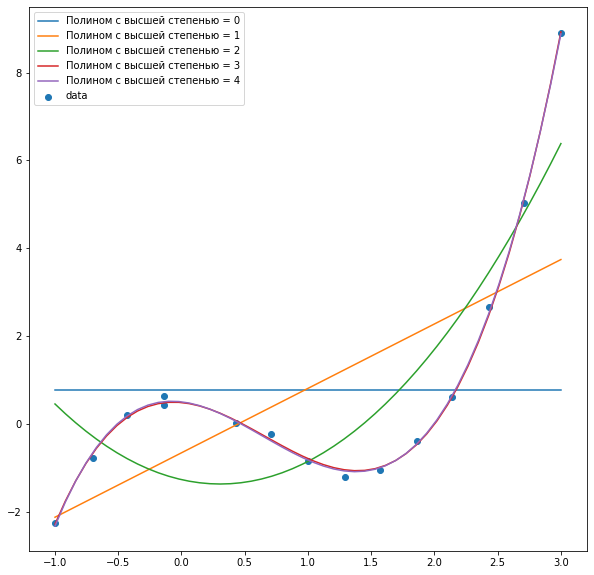

In [8]:
plt.figure(figsize=(10,10))
plt.scatter(x, y, label='data')
mas_x = np.linspace(-1, 3, 50)
for i in range(5):
    solve = solve_sys(i)
    plt.plot(mas_x, design_matrix(i, x=mas_x) @ solve[1], label='Полином с высшей степенью = '+str(i))
plt.legend()
plt.show()

## III. МНК с использовнием QR - разложениея.

Для оптимального значения $m$ из предыдущей части решите задачу МНК, используя безматричную реализацию QR - разложения. Для решения задач линейной алгебры можете использовать библиотечные функции (обратите внимание на `numpy.linalg.solve`, `numpy.linalg.qr` и т.д.) или код предыдущих недель.
Сравните результат с ответом, полученным при решении системы уравнений.

(33% итоговой оценки)

Оптимальное значение m = 3.

Нужно решить задачу наименьших квадратов методом безматричного разложения QR

$$X \beta = y$$

Заменим с помощью QR: $$QR \beta = y \space \rightarrow \beta = R^{-1}Q^{-1} y$$

In [9]:
X = design_matrix(3)
X

array([[ 1.0000000e+00, -1.0000000e+00,  1.0000000e+00, -1.0000000e+00],
       [ 1.0000000e+00, -7.0000000e-01,  4.9000000e-01, -3.4300000e-01],
       [ 1.0000000e+00, -4.3000000e-01,  1.8490000e-01, -7.9507000e-02],
       [ 1.0000000e+00, -1.4000000e-01,  1.9600000e-02, -2.7440000e-03],
       [ 1.0000000e+00, -1.4000000e-01,  1.9600000e-02, -2.7440000e-03],
       [ 1.0000000e+00,  4.3000000e-01,  1.8490000e-01,  7.9507000e-02],
       [ 1.0000000e+00,  7.1000000e-01,  5.0410000e-01,  3.5791100e-01],
       [ 1.0000000e+00,  1.0000000e+00,  1.0000000e+00,  1.0000000e+00],
       [ 1.0000000e+00,  1.2900000e+00,  1.6641000e+00,  2.1466890e+00],
       [ 1.0000000e+00,  1.5700000e+00,  2.4649000e+00,  3.8698930e+00],
       [ 1.0000000e+00,  1.8600000e+00,  3.4596000e+00,  6.4348560e+00],
       [ 1.0000000e+00,  2.1400000e+00,  4.5796000e+00,  9.8003440e+00],
       [ 1.0000000e+00,  2.4300000e+00,  5.9049000e+00,  1.4348907e+01],
       [ 1.0000000e+00,  2.7100000e+00,  7.3441000e

С помощью Housholder reflections будем менять матрицу Х:

In [47]:
X = design_matrix(3)
wise = X.shape[0]
k = 0
for i in range(X.shape[1]):
    z = np.zeros(wise - k)
    z[0] = np.linalg.norm(X[k:,i])
    u = (X[k:,i] - z)/np.linalg.norm(X[k:,i] - z)
    for c in range(X.shape[1]):
        X[k:,c] = (X[k:,c] - 2 * u[:,np.newaxis] @ (u[np.newaxis, :] @ X[k:,c]))
    k += 1
X

array([[ 3.87298335e+00,  3.80326965e+00,  9.76515947e+00,
         2.15628665e+01],
       [ 0.00000000e+00,  4.83274663e+00,  9.59559686e+00,
         2.73434867e+01],
       [ 0.00000000e+00,  5.45855049e-16,  5.16911216e+00,
         1.57125860e+01],
       [ 0.00000000e+00, -1.92547010e-16, -1.20233262e-16,
         5.54879315e+00],
       [ 0.00000000e+00, -5.06705718e-16,  3.08299253e-17,
         0.00000000e+00],
       [ 0.00000000e+00, -8.78504951e-17, -9.38321314e-17,
         1.11022302e-16],
       [ 0.00000000e+00, -1.72781555e-17, -1.11514720e-16,
        -3.46944695e-18],
       [ 0.00000000e+00,  2.70135194e-17, -1.33509944e-16,
        -1.11022302e-16],
       [ 0.00000000e+00,  1.44831276e-16, -1.55312784e-16,
        -2.22044605e-16],
       [ 0.00000000e+00,  1.91308989e-16, -1.16933376e-16,
        -4.44089210e-16],
       [ 0.00000000e+00,  1.83525818e-16, -5.73585966e-17,
        -4.44089210e-16],
       [ 0.00000000e+00,  9.23247624e-17,  4.16594581e-17,
      

Мы нашли нашу матрицу R. Сделаем ее квадратной (выбросим строчки с нулями)

In [37]:
R = X[:4,:4]
R

array([[ 3.87298335e+00,  3.80326965e+00,  9.76515947e+00,
         2.15628665e+01],
       [ 0.00000000e+00,  4.83274663e+00,  9.59559686e+00,
         2.73434867e+01],
       [ 0.00000000e+00,  5.45855049e-16,  5.16911216e+00,
         1.57125860e+01],
       [ 0.00000000e+00, -1.92547010e-16, -1.20233262e-16,
         5.54879315e+00]])

In [44]:
Q = X @ np.linalg.pinv(R)

In [45]:
coeff = np.linalg.pinv(R) @ np.linalg.pinv(Q) @ y #коэффициенты полинома
coeff

array([ 0.49483598, -0.26983377, -2.01973166,  1.01540301])

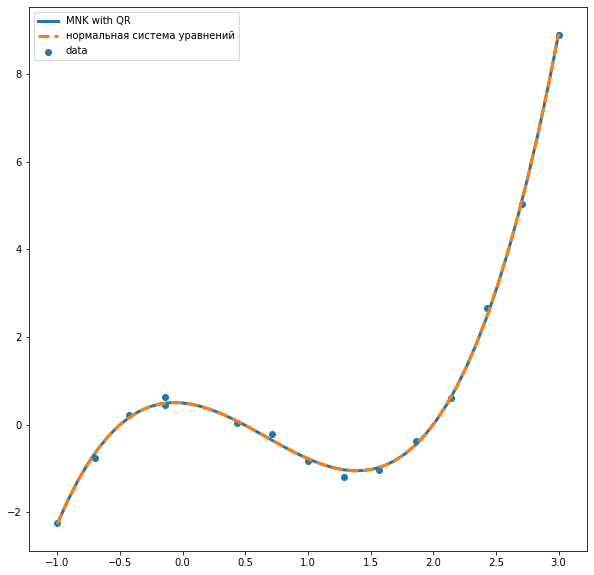

In [46]:
plt.figure(figsize=(10,10))
mas_x = np.linspace(-1, 3, 50)
plt.plot(mas_x, design_matrix(i, x=mas_x) @ coeff, label='MNK with QR', linewidth=3)
plt.scatter(x, y, label='data')
solve = solve_sys(3)
plt.plot(mas_x, design_matrix(i, x=mas_x) @ solve[1], label='нормальная система уравнений', ls='--', linewidth=3)
plt.legend()
plt.show()

Как видно решение нормальной системы уравнений совпадает с решением MNK с помощью QR.